In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\vpj16\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
def f(x):
    return 3*x**2-4*x+5

In [7]:
xs=np.arange(-5,5,0.25)
ys=f(xs)
(xs,ys)

(array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
        -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
        -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
         1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
         4.  ,  4.25,  4.5 ,  4.75]),
 array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
         55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
         25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
          7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
          4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
         13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
         37.    ,  42.1875,  47.75  ,  53.6875]))

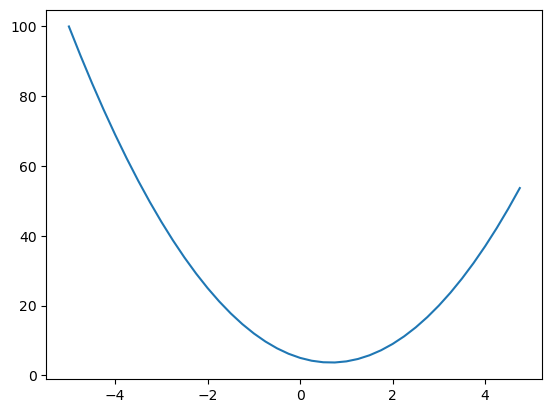

In [8]:
plt.plot(xs,ys)

In [9]:
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [10]:
h=0.0001

#inputs
a=2.0
b=-3.0
c=10.0

d1=a*b+c
a+=h

d2=a*b+c
print(" d1:",d1,"\n","d2:",d2)
print("slope:",(d1-d2)/h)

 d1: 4.0 
 d2: 3.999699999999999
slope: 3.000000000010772


---
<br/>

> **Classes and instances walkover**
```python
class Dog:
    # Constructor method (special method)
    def __init__(self, name, age ):
        self.name = name        # Attribute (also called instance variable)
        self.age = age          # Attribute

    # Instance method
    def bark(self):
        print(f"{self.name} says woof!")

    # Another instance method
    def birthday(self):
        self.age += 1
        print(f"Happy Birthday, {self.name}! You are now {self.age} years old.")

     # Another instance method
    def died(self):
        self.age -= self.age
        print(f"Oo lele, {self.name}! You are now {self.age} years old , better luck next time")

    # Special method for string representation
    def __repr__(self):
        return f"Dog(name={self.name}, age={self.age})"
        
my_dog=Dog("tututu",101 )
my_dog.died()
```
---

<br/>

> Most Useful Python Magic Methods for Customizing Object Behavior

Here are key magic methods that let you customize how your objects behave in Python:

| Magic Method                  | Purpose                                      |
|------------------------------|----------------------------------------------|
| `__init__(self, ...)`         | Object initialization (constructor)          |
| `__repr__(self)`              | Official string representation (debugging)  |
| `__str__(self)`               | Informal string representation (print)      |
| `__add__(self, other)`        | Addition operator `+`                         |
| `__sub__(self, other)`        | Subtraction operator `-`                      |
| `__mul__(self, other)`        | Multiplication operator `*`                   |
| `__truediv__(self, other)`    | Division operator `/`                         |
| `__eq__(self, other)`         | Equality operator `==`                        |
| `__lt__(self, other)`         | Less-than operator `<`                        |
| `__len__(self)`               | Called by `len()` function                    |
| `__getitem__(self, key)`      | Enables indexing `obj[key]`                   |
| `__setitem__(self, key, value)` | Enables item assignment `obj[key] = value` |
| `__call__(self, ...)`         | Makes instance callable like a function      |
| `__iter__(self)`              | Returns an iterator for iteration             |
| `__next__(self)`              | Returns next item in an iterator              |
| `__bool__(self)`              | Defines truthiness for `bool()`               |
| `__enter__(self)`             | Enter method for context managers (`with`)   |
| `__exit__(self, exc_type, exc_val, exc_tb)` | Exit method for context managers |

---

These methods integrate your objects seamlessly with Python’s syntax and built-in functions, enabling operator overloading, iteration, function calls, and more.

For a full list and details, see the official Python data model documentation:  
https://docs.python.org/3/reference/datamodel.html#special-method-names
//docs.python.org/3/library/functions.html

In [13]:
class Value:
    def __init__(self, data ,_children=(), _op='' ,label='' ):
        self.data=data
        self.grad=0.0
        self._backward= lambda: None
        self._op=_op
        self._prev= set(_children)
        self.label=label
    def __add__(self,other):
        out=Value(self.data + other.data , (self,other),'+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward= _backward
        return out
    def __mul__(self,other):
        out=Value(self.data*other.data , (self,other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward= _backward
        return out
    def __repr__(self):
        return f"Value:(data={self.data})"
    def tanh(self):
        x=self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward= _backward
        return out
    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

a=Value(2.0 , label='a')
b=Value(-3.0 , label='b')
c=Value(10 , label='c')
e=a*b; e.label='e'
d=e+c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L


Value:(data=-8.0)

In [14]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data ,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [15]:
# # manual backp. grads 
# d.grad=-2.0
# f.grad=4.0
# e.grad=-2.0
# c.grad=-2.0
# b.grad= -2 * 2
# a.grad=-2 * -3 
# L.grad=1.0

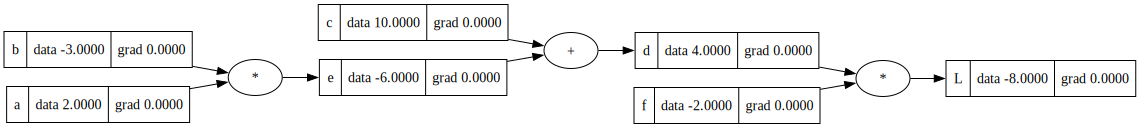

In [16]:
draw_dot(L)

In [17]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-8.0


In [18]:
def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data
  
  print((L2 - L1)/h)
  
lol()

-3.9999999999995595


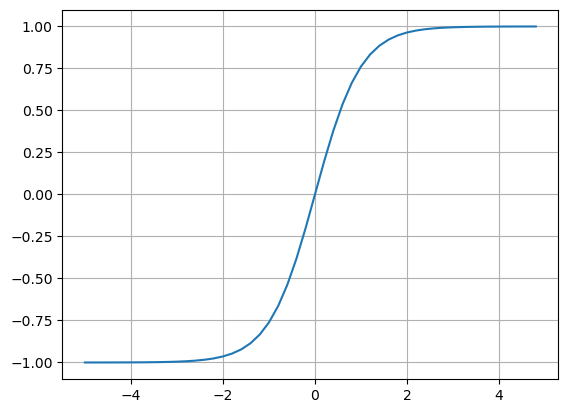

In [19]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid()

In [20]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label='o' 

In [21]:
o._gra
o.backward()

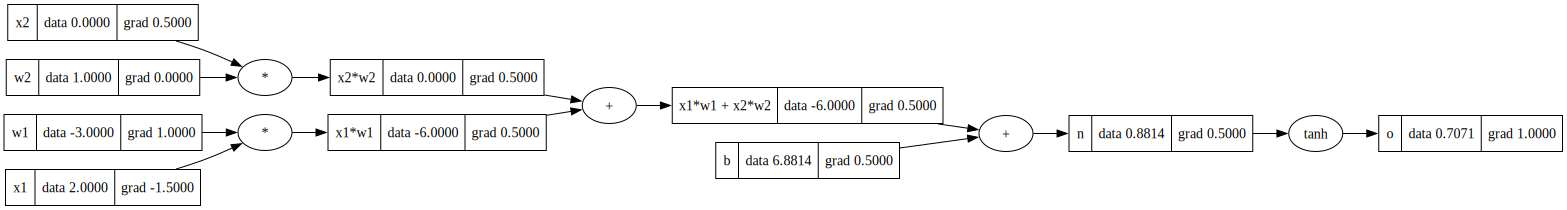

In [22]:
draw_dot(o)

> Topological Sort
```python
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo
```
> Returns : list of items from beg.1865476)]865476)]
(o)
topo